In [1]:
from opensimrl.train_sac import train_sac_pendulum_fast
import matplotlib.pyplot as plt

In [2]:
rewards = train_sac_pendulum_fast()

2025/09/21 19:58:39 INFO mlflow.tracking.fluent: Experiment with name 'sac' does not exist. Creating a new experiment.


Epoch 1 | TrainRet -1287.281 | TestRet -1772.524 | LossQ 5.8413 | LossPi 16.0990 | Q1 -16.344 | Q2 -16.236 | Interacts 2000 | Time 2.36s
Epoch 2 | TrainRet -1153.528 | TestRet -378.699 | LossQ 1.7907 | LossPi 52.7701 | Q1 -53.574 | Q2 -53.568 | Interacts 4000 | Time 6.97s
Epoch 3 | TrainRet -716.919 | TestRet -160.778 | LossQ 3.1127 | LossPi 87.7446 | Q1 -89.540 | Q2 -89.536 | Interacts 6000 | Time 11.64s
Epoch 4 | TrainRet -145.225 | TestRet -198.086 | LossQ 5.6476 | LossPi 89.5980 | Q1 -91.471 | Q2 -91.469 | Interacts 8000 | Time 16.44s
Epoch 5 | TrainRet -84.230 | TestRet -201.738 | LossQ 6.8838 | LossPi 81.8623 | Q1 -83.764 | Q2 -83.762 | Interacts 10000 | Time 21.16s
Epoch 6 | TrainRet -179.874 | TestRet -235.121 | LossQ 6.5000 | LossPi 72.2824 | Q1 -74.186 | Q2 -74.185 | Interacts 12000 | Time 25.93s
Epoch 7 | TrainRet -142.603 | TestRet -222.006 | LossQ 5.4374 | LossPi 63.4257 | Q1 -65.160 | Q2 -65.159 | Interacts 14000 | Time 30.64s
Epoch 8 | TrainRet -154.727 | TestRet -122.04

In [4]:
import mlflow
import matplotlib.pyplot as plt
import numpy as np

# Make sure you have run train_sac_pendulum_fast() already in the session
# It will create/update runs under ./mlruns by default.

mlflow.set_tracking_uri("file:./mlruns")
exp = mlflow.get_experiment_by_name("sac")
assert exp is not None, "Experiment 'sac' not found. Run training first."

# Get most recent run in this experiment
runs = mlflow.search_runs(experiment_ids=[exp.experiment_id],
                          order_by=["start_time DESC"],
                          max_results=1)
assert len(runs) > 0, "No runs found. Run training first."
run_id = runs.iloc[0]["run_id"]

# Fetch history of the metric logged per epoch
from mlflow.tracking import MlflowClient
client = MlflowClient()
hist = client.get_metric_history(run_id, "TestEpRetMean")

# Build arrays; MLflow stores steps as total env interactions, but we can index epochs as 1..N
y = [m.value for m in hist]
x = np.arange(1, len(y) + 1)



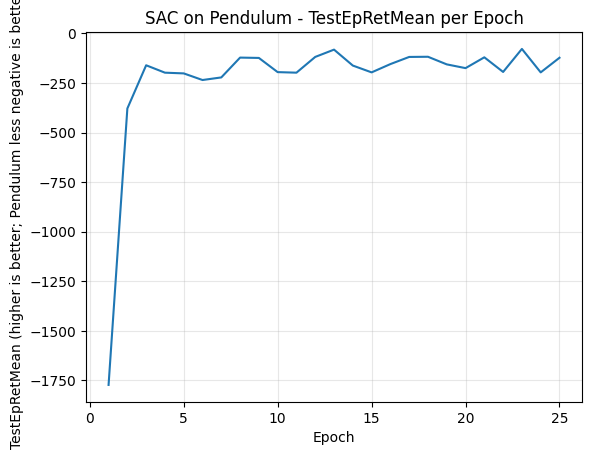

In [5]:
plt.plot(x, y)
plt.title("SAC on Pendulum - TestEpRetMean per Epoch")
plt.xlabel("Epoch")
plt.ylabel("TestEpRetMean (higher is better; Pendulum less negative is better)")
plt.grid(True, alpha=0.3)
plt.show()